# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span><b>Principal objetivo:</b> A entrega de um modelo que seja capaz de prever com precisão máxima a renda de um indivíduo levando em consideração diversos fatores sobre o mesmo.</span>

<span><b>O recurso principal para realizar a previsão se trata de um Dataset com diversas variáveis explicativas.</b></span>

<span><b>Os principais interessados na realização da previsão de renda podem ser:</b> Seguradoras, Bancos e outras instituições financeiras.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span> A princípio, os dados são compostos por 13 variáveis independentes, ou seja, que serão utilizadas com o único objetivo de melhorar a análise e a previsibilidade do nosso modelo e 1 variável dependente (renda) que será a variável que o modelo tentará prever baseado nas informação providas pelas variáveis independentes.</span>


### Dicionário de dados

<span>Abaixo se encontra um dicionário completo dos dados iniciais do nosso dataset principal, incluindo o nome das variáveis, descrição e o tipo da variável.</span>

<span>Vale mencionar também que os dados apresentados abaixo poderão sofrer alterações de tipo, ou contar com a remoção de algumas dessas variáveis para o melhor desempenho do modelo.</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data da coleta dos dados                                      | datatime|
| id_cliente              |  ID único do cliente em questão                                      | int|
| sexo                    |  Sexo do cliente em questão                                      | object|
| posse_de_veiculo        |  Posse de veículo próprio ou não                                     | bool|
| posse_de_imovel         |  Posse de imóvel próprio ou não                                     | bool|
| qtd_filhos              |  A quantidade de filhos que o cliente possui                                      | int|
| tipo_renda              |  Empresário, Assalariado, Servidor Público, Pensionista ou Bolsista                                      | object|
| educacao                |  Primário, Secundário, Superior Incompleto, Superior Completo, ou Pós Graduação                                      | object|
| estado_civil            |  Solteiro, Casado, Viúvo, União ou Separado                                      | object|
| tipo_residencia         |  Casa, Governamental, Com os pais, Aluguel, Estúdio ou Comunitário                                      | object|
| idade                   |  Idade do cliente em questão                                      | int|
| tempo_emprego           |  Tempo de emprego (em anos) do cliente em questão                                      | float|
| qt_pessoas_residencia   |  Quantidade de pessoas vivendo na residência do cliente em questão                                      | float|
| renda                   |  Renda do cliente em questão (Variável dependente)                                      | float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [110]:
import ydata_profiling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [111]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Aqui, estamos utilizando a biblioteca ydata-profiling para um primeiro contato com o DataSet, desta maneira podemos realizar uma limpeza inicial.

In [112]:
%%capture
(ProfileReport(renda, title="Profiling Report Renda", explorative=True, minimal=True)
        .to_file("./output/report_renda.html"))

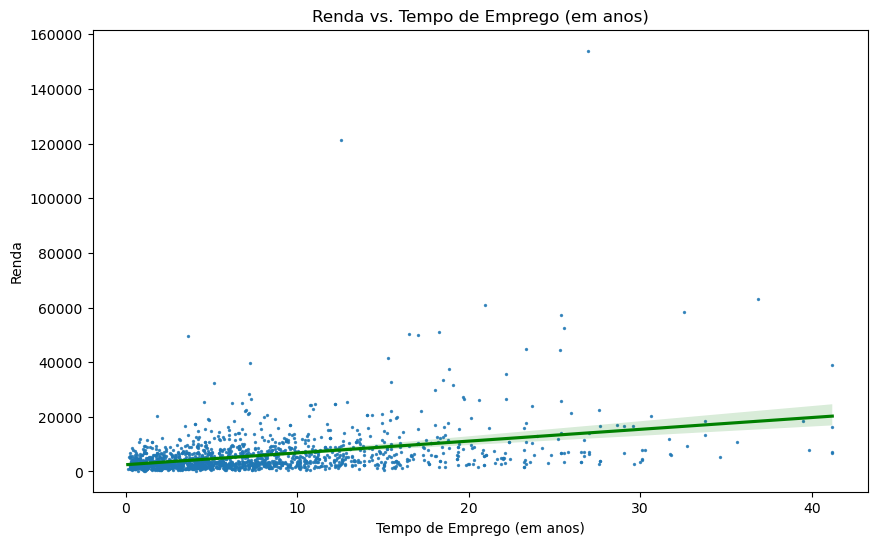

In [113]:
plt.figure(figsize=(10, 6))
sns.regplot(y = 'renda', x = 'tempo_emprego', data = renda.head(2000), scatter_kws={'s': 2}, line_kws={'color': 'green'})
plt.title('Renda vs. Tempo de Emprego (em anos)')
plt.xlabel('Tempo de Emprego (em anos)')
plt.ylabel('Renda')
plt.show()

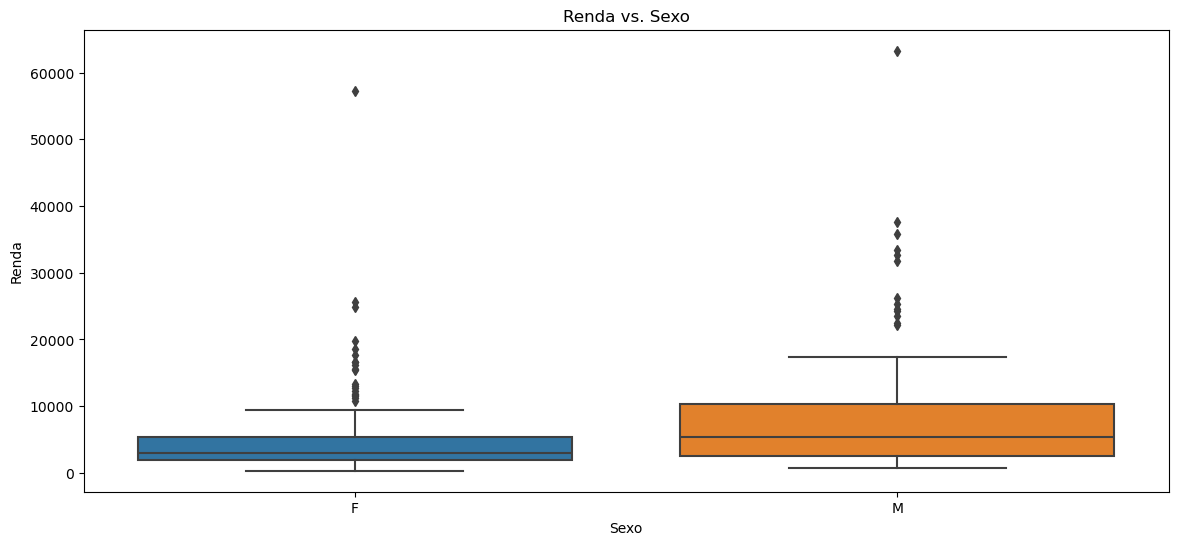

In [114]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='sexo', y='renda', data=renda.head(400))
plt.title('Renda vs. Sexo')
plt.xlabel('Sexo')
plt.ylabel('Renda')
plt.show()

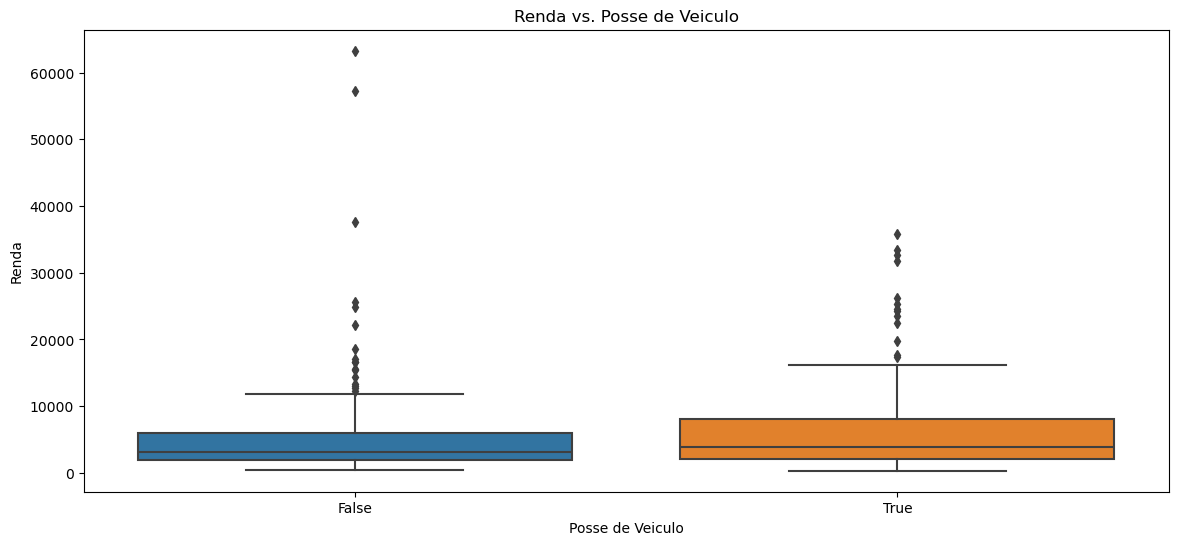

In [115]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='posse_de_veiculo', y='renda', data=renda.head(400))
plt.title('Renda vs. Posse de Veiculo')
plt.xlabel('Posse de Veiculo')
plt.ylabel('Renda')
plt.show()

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




Para uma análise Bivariada dos nossos dados, podemos criar um heatmap que captura a corelação entre as diversas variáveis que possuímos.


In [116]:
numeric_bool_df = renda.select_dtypes(include=['number', 'bool'])
numeric_bool_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_bool_df.dropna(inplace=True)
numeric_bool_df = numeric_bool_df.astype(int)
correlation_matrix = numeric_bool_df.corr()

In [117]:
correlation_matrix.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

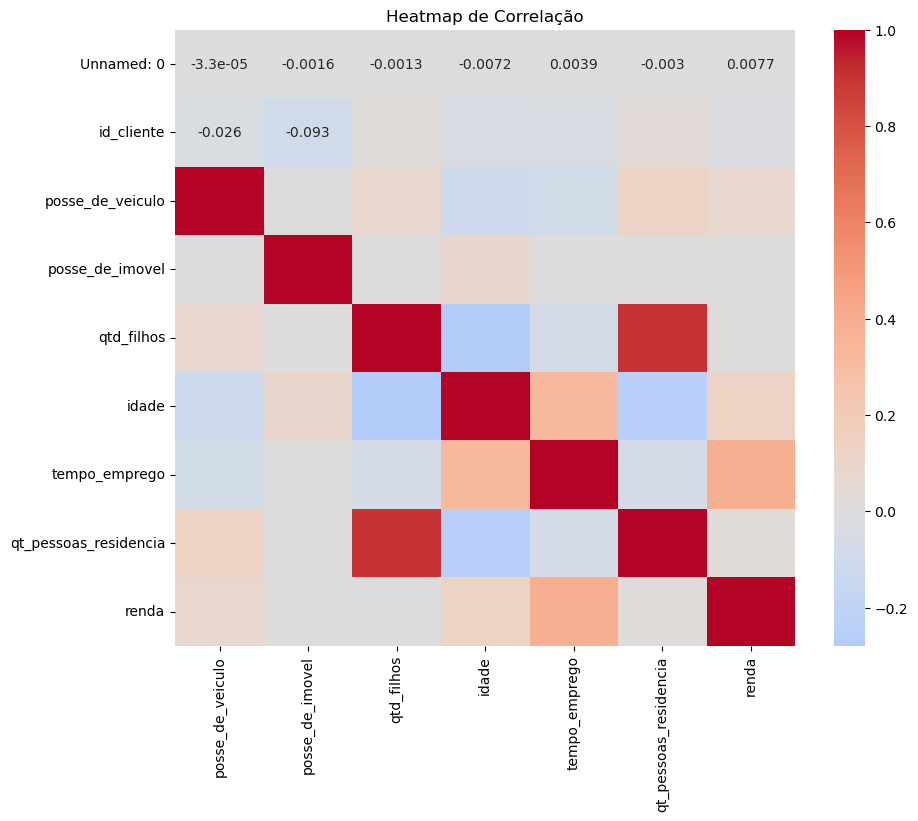

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

Através do Heatmap demonstrado acima, é possível percebermos com maior clareza quais variáveis são diretamente correlacionadas umas com as outras e quais são mais correlacionadas com a métrica de renda de um indivíduo. Através destas informações, podemos começar a limpar os dados.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Iremos remover algumas colunas que não serão úteis para a nossa análise e para construirmos o modelo.

In [136]:
renda_df = (renda
    .drop(columns=['Unnamed: 0', 'id_cliente', 'data_ref'])
    .dropna(subset=['tempo_emprego'])
    .drop_duplicates()
    .reset_index(drop=True)
)

<span>Também iremos criar variáveis (features) que podem ser úteis para o treinamento do nosso modelo.</span>
</br>
<span>Neste caso, seria útil termos mais de uma maneira de explicar algumas features, por isso criei as novas features "Tempo de Emprego Idade Ratio" e "Log Renda".</span>

In [137]:
renda_df = (renda_df
    .assign(tempo_emprego_idade_ratio = lambda x: x['tempo_emprego'] / x['idade'])
    .assign(log_renda = lambda x: np.log(x['renda']))
)

### Abaixo se encontra um novo dicionário de dados, que inclui as alterações feitas até o momento.

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| sexo                    |  Sexo do cliente em questão                                      | object|
| posse_de_veiculo        |  Posse de veículo próprio ou não                                     | bool|
| posse_de_imovel         |  Posse de imóvel próprio ou não                                     | bool|
| qtd_filhos              |  A quantidade de filhos que o cliente possui                                      | int|
| tipo_renda              |  Empresário, Assalariado, Servidor Público, Pensionista ou Bolsista                                      | object|
| educacao                |  Primário, Secundário, Superior Incompleto, Superior Completo, ou Pós Graduação                                      | object|
| estado_civil            |  Solteiro, Casado, Viúvo, União ou Separado                                      | object|
| tipo_residencia         |  Casa, Governamental, Com os pais, Aluguel, Estúdio ou Comunitário                                      | object|
| idade                   |  Idade do cliente em questão                                      | int|
| tempo_emprego           |  Tempo de emprego (em anos) do cliente em questão                                      | float|
| qt_pessoas_residencia   |  Quantidade de pessoas vivendo na residência do cliente em questão                                      | float|
| renda                   |  Renda do cliente em questão (Variável dependente)                                      | float|
| tempo_emprego_idade_ratio                   |  Se trata da divisão do tempo de emprego pela idade do indivíduo. Valores tendem a ser mais altos para quem trabalhou mais e tem uma idade menor                                   | float|
| log_renda                   |      O logaritmo natural da renda do indivíduo. Esta métrica auxilia no maqueamento de outliers                               | float|

#### Iremos gerar um report atualizado

In [138]:
%%capture
(ProfileReport(renda_df, title="Profiling Report Renda (post-cleaning)", explorative=True)
        .to_file("./output/report_renda_post_cleaning.html"))

#### Iremos gerar um heatmap para identificar as novas relações entre as variáveis recém-criadas

C:\Users\Hanga\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


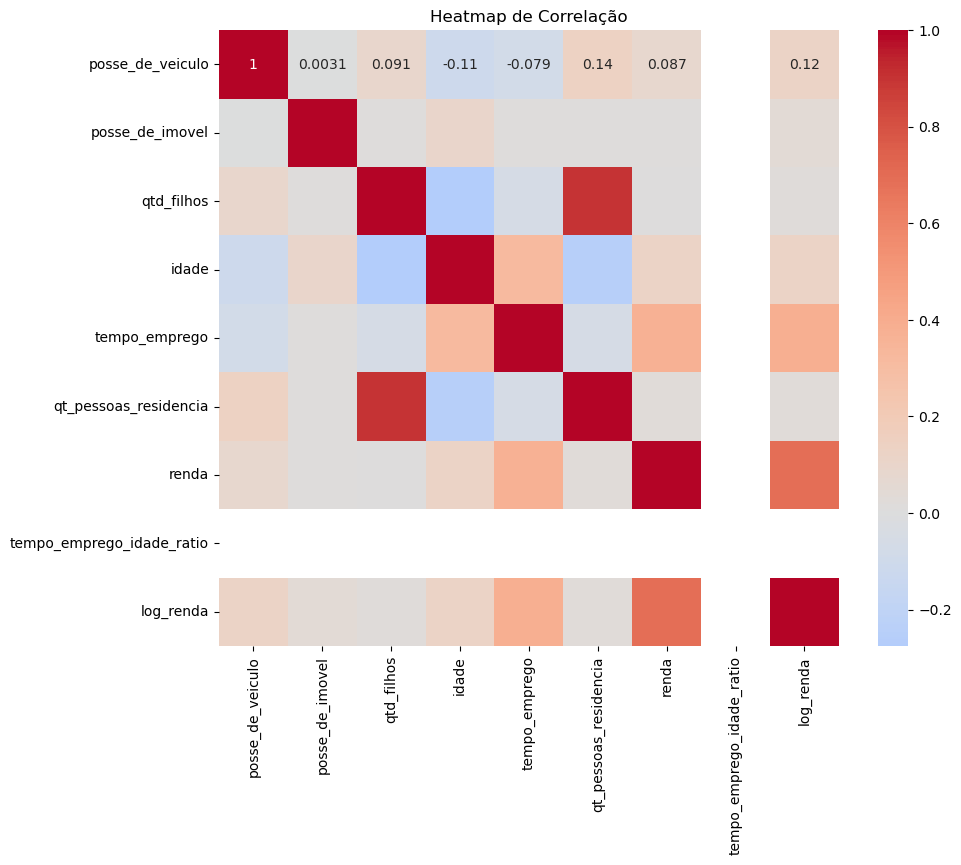

In [139]:
numeric_bool_df = renda_df.select_dtypes(include=['number', 'bool'])
numeric_bool_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_bool_df.dropna(inplace=True)
numeric_bool_df = numeric_bool_df.astype(int)
correlation_matrix = numeric_bool_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span>Para a modelagem, iremos utilizar a técnica de regressão múltipla, que é ideal para prevermos uma variável contínua em relação às diversas variáveis explicativas de diferentes formatos.</span>


In [159]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [160]:
train_df, test_df = train_test_split(renda_df, test_size=0.2, random_state=40)

In [161]:
formula = (
    'renda ~ '
    'C(sexo) + '
    'C(posse_de_veiculo) + '
    'C(posse_de_imovel) + '
    'qtd_filhos + '
    'C(tipo_renda) + '
    'C(posse_de_imovel) + '
    'C(educacao) + '
    'C(estado_civil) + '
    'C(tipo_residencia) + '
    'C(tipo_residencia) + '
    'idade + '
    'tempo_emprego + '
    'qt_pessoas_residencia + '
    'tempo_emprego_idade_ratio'
)

reg = smf.ols(formula, data = train_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     97.98
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:40:16   Log-Likelihood:                -71778.
No. Observations:                6924   AIC:                         1.436e+05
Df Residuals:                    6898   BIC:                         1.438e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -3444.4406   3130.893     -1.100      0.271   -9581.955    2693.074
C(sexo)[T.M]                         6264.3541    209.674     29.877      0.000    5853.329    6675.379
C(posse_de_veiculo)[T.True]            66.0237    202.681      0.326      0.745    -331.294     463.341
C(posse_de_imovel)[T.True]            320.8597    200.299      1.602      0.109     -71.788     713.508
C(tipo_renda)[T.Bolsista]           -1491.0346   3453.857     -0.432      0.666   -8261.659    5279.590
C(tipo_renda)[T.Empresário]           738.7069    213.759      3.456      0.001     319.674    1157.740
C(tipo_renda)[T.Pensionista]        -1517.4863   4453.936     -0.341      0.733   -1.02e+04    7213.600
C(tipo_renda)[T.Servidor público]      83.8721    321.009      0.261      0.794    -545.405     713.150
C(educacao)[T.Pós graduação]          297.1212   2374.503      0.125      0.900   -4357.636    4951.878
C(educacao)[T.Secundário]             -97.2493   1032.424     -0.094      0.925   -2121.119    1926.620
C(educacao)[T.Superior completo]      411.0893   1036.244      0.397      0.692   -1620.268    2442.447
C(educacao)[T.Superior incompleto]   -800.1680   1125.765     -0.711      0.477   -3007.013    1406.677
C(estado_civil)[T.Separado]           941.5221   1438.747      0.654      0.513   -1878.864    3761.909
C(estado_civil)[T.Solteiro]           685.1450   1406.543      0.487      0.626   -2072.112    3442.402
C(estado_civil)[T.União]             -551.9013    346.249     -1.594      0.111   -1230.655     126.853
C(estado_civil)[T.Viúvo]             1017.0453   1507.627      0.675      0.500   -1938.367    3972.458
C(tipo_residencia)[T.Casa]            110.0920    762.962      0.144      0.885   -1385.549    1605.733
C(tipo_residencia)[T.Com os pais]    -160.9195    852.668     -0.189      0.850   -1832.411    1510.572
C(tipo_residencia)[T.Comunitário]    -156.3140   1495.856     -0.104      0.917   -3088.653    2776.025
C(tipo_residencia)[T.Estúdio]         868.0004   1329.679      0.653      0.514   -1738.580    3474.581
C(tipo_residencia)[T.Governamental]  -515.3631    937.696     -0.550      0.583   -2353.537    1322.810
qtd_filhos                          -1171.3525   1388.730     -0.843      0.399   -3893.690    1550.985
idade                                   0.0532     16.906      0.003      0.997     -33.087      33.194
tempo_emprego                         828.4512     73.080     11.336      0.000     685.191     971.711
qt_pessoas_residencia                1326.9372   1385.508      0.958      0.338   -1389.084    4042.959
tempo_emprego_idade_ratio           -1.255e+04   3267.113     -3.842      0.000    -1.9e+04   -6146.373
===================================================================

### Rodando o modelo


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.